In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [155]:
df = pd.read_csv("/Users/matthesfogtmann/Downloads/Sheet 2-Table 1.csv")

In [156]:
mapper = {"Q1":"April","Q2":"July","Q3":"October","Q4":"January"}
def make_real_date(i):
    time = i.split(" ")
    
    year = int(time[0])+2000
    month = mapper[time[-1]]
    
    if month == "January":
        year += 1
    
    return str(year) +" "+ str(month)



In [157]:
df["Q"] = df["Q"].apply(make_real_date)

In [158]:
df["Q"] = pd.to_datetime(df["Q"])

In [159]:
df.set_index("Q",inplace=True)

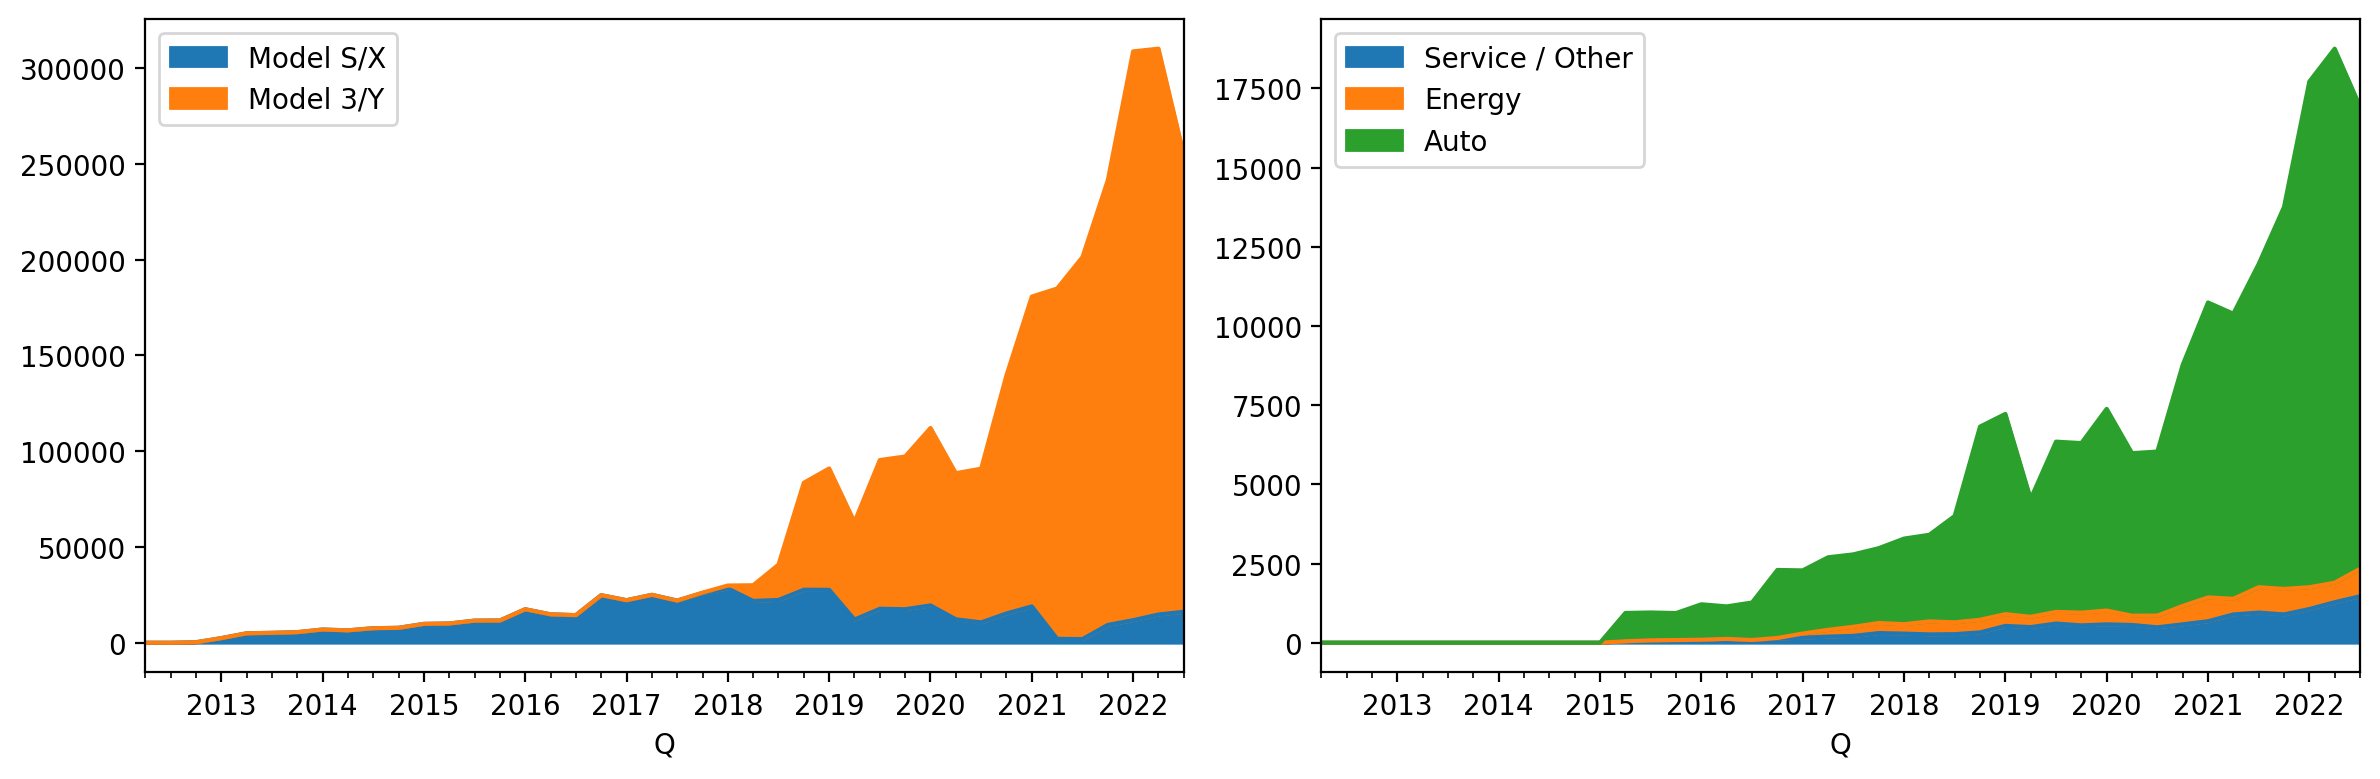

In [160]:
fig, ax = plt.subplots(1,2,figsize=(12,4),dpi=200)

revenue_cols = ['Model 3/Y', 'Model S/X'][::-1]
df[revenue_cols].plot.area(ax=ax[0]);

revenue_cols = ["Auto","Energy","Service / Other"][::-1]

df[revenue_cols].plot.area(ax=ax[1])



plt.tight_layout();

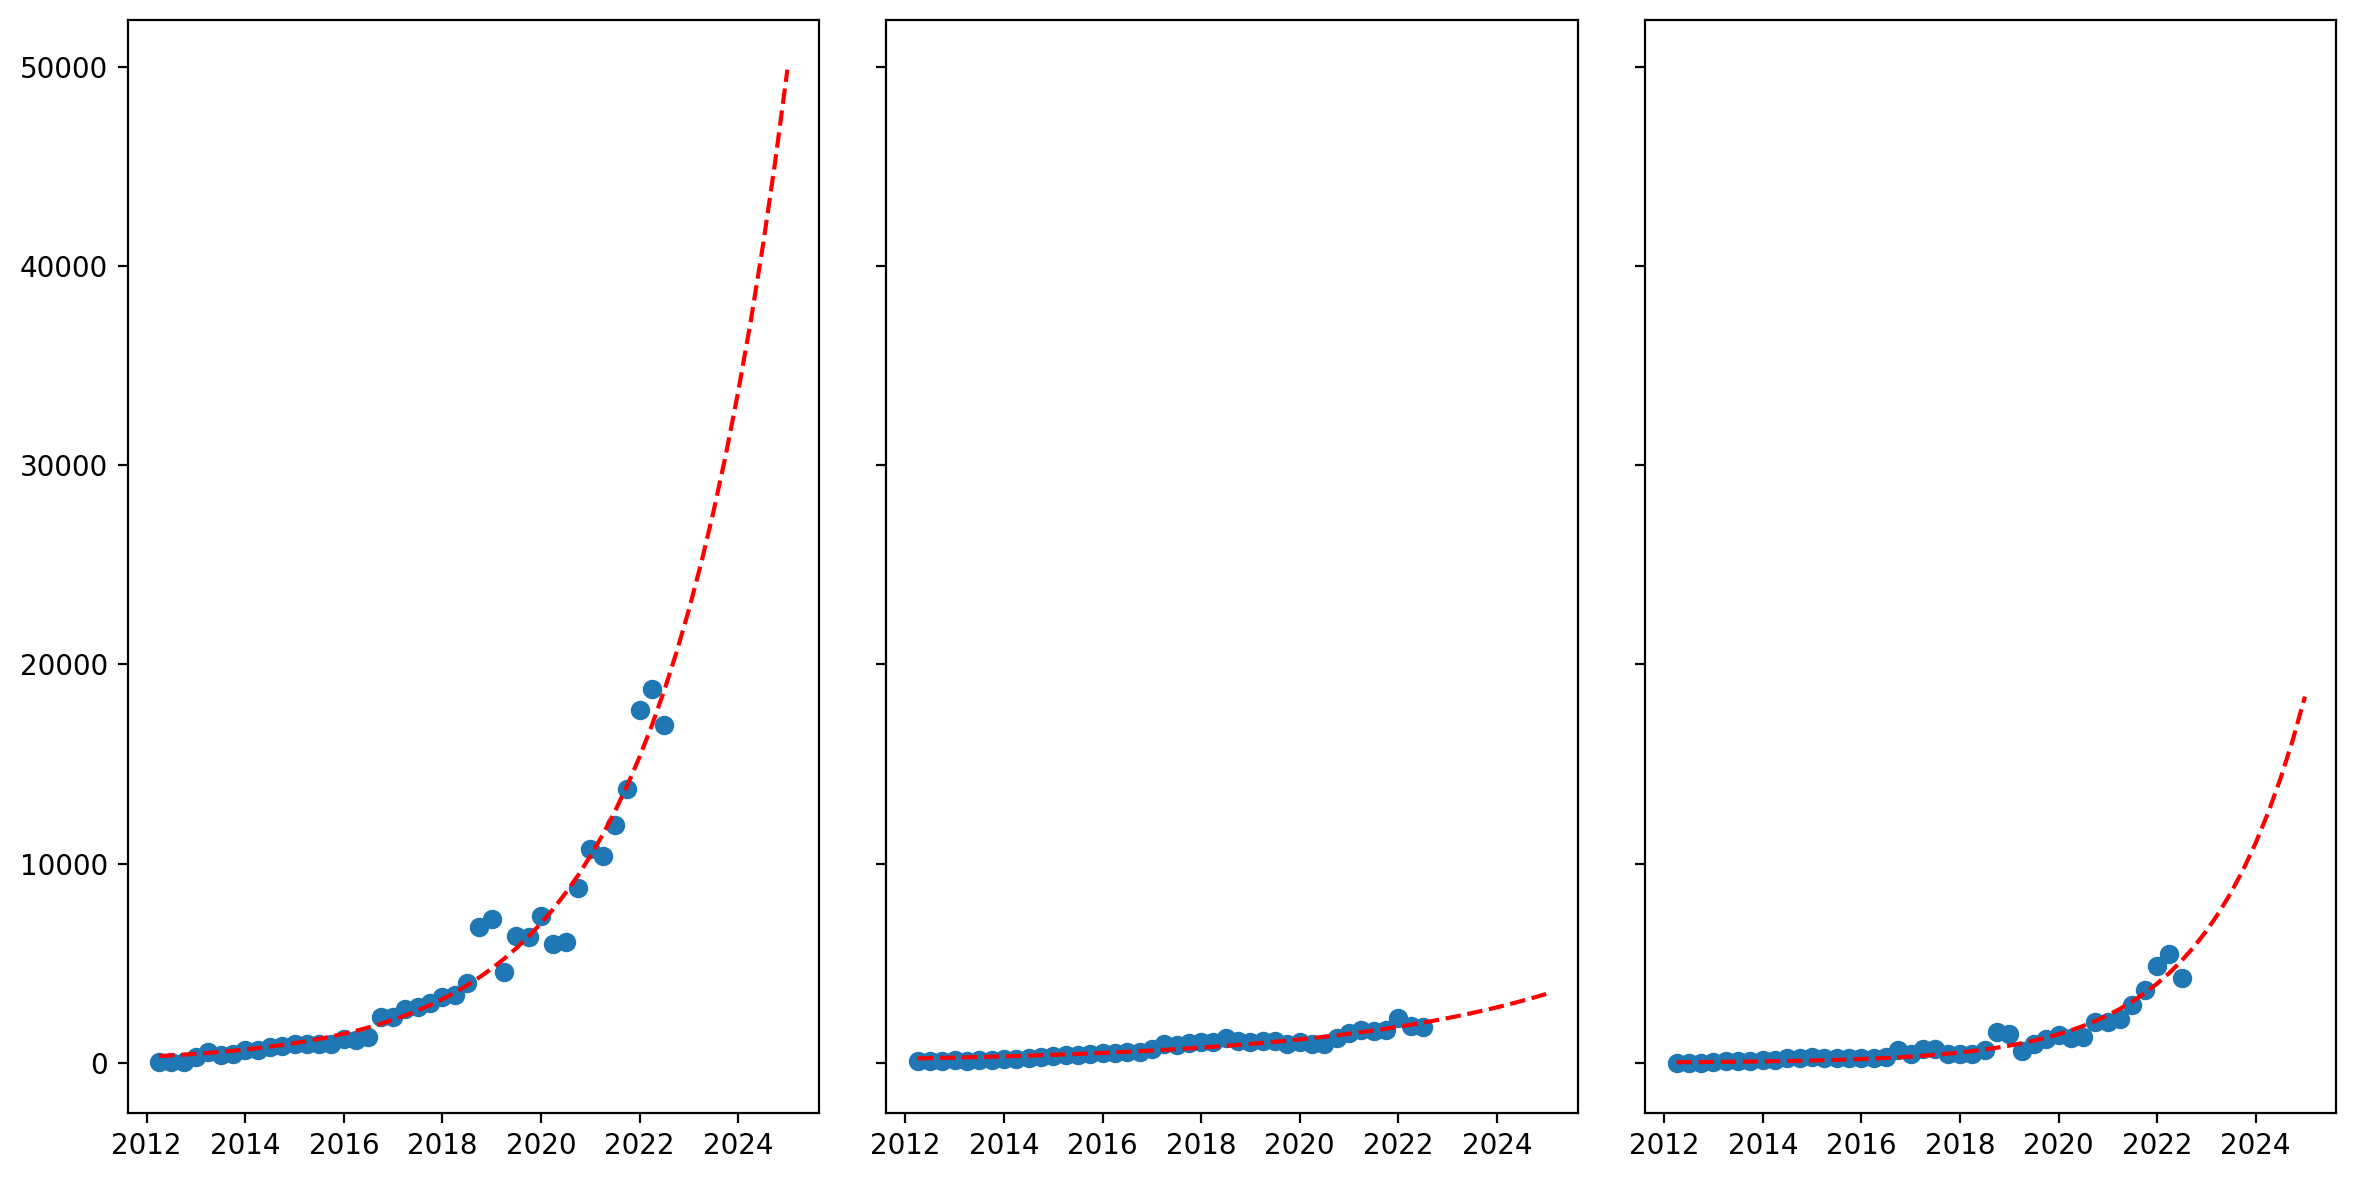

In [213]:
def f(x,a,b,c):
    return a**(b*(x-c))
    

xdata = df["df_new_time"]
fig, ax = plt.subplots(1,3,figsize=(12,6),dpi=200,sharey=True)

x_data_fit = np.arange(2012.25,2025.25,0.25)

for i,y in enumerate(["Revenue","Operating Expenses","Gross Profit"]):

    y = df[y]

    coef, cvar = curve_fit(f,xdata,y,p0=[2,4,2000])

    ax[i].scatter(xdata,y)
    ax[i].plot(x_data_fit,f(x_data_fit,*coef),c="r",linestyle="--");



plt.tight_layout();

In [210]:
x_data_fit = np.arange(2012.25,2025.25,0.25)

In [211]:
x_data_fit

array([2012.25, 2012.5 , 2012.75, 2013.  , 2013.25, 2013.5 , 2013.75,
       2014.  , 2014.25, 2014.5 , 2014.75, 2015.  , 2015.25, 2015.5 ,
       2015.75, 2016.  , 2016.25, 2016.5 , 2016.75, 2017.  , 2017.25,
       2017.5 , 2017.75, 2018.  , 2018.25, 2018.5 , 2018.75, 2019.  ,
       2019.25, 2019.5 , 2019.75, 2020.  , 2020.25, 2020.5 , 2020.75,
       2021.  , 2021.25, 2021.5 , 2021.75, 2022.  , 2022.25, 2022.5 ,
       2022.75, 2023.  , 2023.25, 2023.5 , 2023.75, 2024.  , 2024.25,
       2024.5 , 2024.75, 2025.  ])

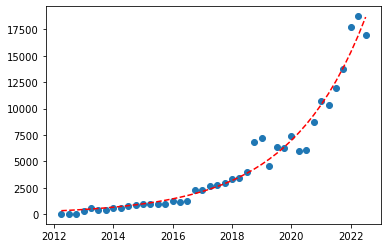

In [187]:
def float_time(x):

    date = str(x)[:7].split("-")

    return int(date[0]) + (int(date[-1])-1)/3*0.25


In [164]:
df["df_new_time"] = df.index

df["df_new_time"] = df["df_new_time"].apply(float_time)